## The Goal of the Script is to perform:
Feature Engineering: Feature Handling (handle correlated features)

### Two approaches were covered in the lecture:
1. Deleting one of the features, if two features are highly correlated
2. Perform feature reduction technique to create a new feature

MultiCollinearity - [Reference Link](https://www.statisticshowto.com/multicollinearity/)

Nice Read Blog - [Reference Link](https://blog.clairvoyantsoft.com/correlation-and-collinearity-how-they-can-make-or-break-a-model-9135fbe6936a)

### Environment Setup for the Boston Housing Price Prediction

In [1]:
# Importing the libraries
import pandas as pd

# Library for dataset
from sklearn.datasets import load_boston

# Libraries to train the model
from sklearn.model_selection import train_test_split

# Visualisation Library
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the dataset: Dataset is the Boston House Pricing Dataset
# It is a Regression problem where the goal is to predict the house price based on features of the house
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["MEDV"] = data.target

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets includ

In [3]:
# Features present in the Boston Dataset for House Price Prediction, i.e., Independent Features
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
# Dataset with Dependent Features, i.e., MEDV and Independent Features
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Basically we have 2 types of variables, dependent and independent variables, 
if you have 2 or 3 independent variables which are highly correlated (we can set a threshold, 90% or more) with each other then we can only use one of them and that should also be fine for training our ML model. - **Multicollinearity**

Map the independent variable to the dependent variable to see their correlation if they are highly correlated then use the Independent variable for training. - **Correlated Features**

In [5]:
# Preparing the dataset to solve the Regression Problem

# Prepare the Dependent feature, i.e., MEDV feature as the Dependent feature
y = df["MEDV"]

# Features other than MEDV feature are now considered as Independent features
X = df.drop("MEDV",axis=1) 
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Finding out the Correlated features

In [6]:
# Split the data in 80:20 ratio for training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [7]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [8]:
# Applying Filter based feature selection techniques to find the correlation between the features present in the training dataset
X_train.corr() # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

# By default, Pearson Correlation Coefficient is used to find the correlation between features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.198855,0.400198,-0.044589,0.396406,-0.200303,0.334090,-0.366487,0.615947,0.576894,0.288970,-0.356858,0.414142
ZN,-0.198855,1.000000,-0.533489,-0.043754,-0.526414,0.274661,-0.575078,0.681817,-0.313790,-0.294267,-0.389163,0.178652,-0.396572
INDUS,0.400198,-0.533489,1.000000,0.095158,0.770957,-0.398690,0.636569,-0.707566,0.588952,0.702353,0.348303,-0.363151,0.603644
CHAS,-0.044589,-0.043754,0.095158,1.000000,0.135476,0.111272,0.096016,-0.121671,0.028685,0.007746,-0.113003,0.041666,-0.070652
NOX,0.396406,-0.526414,0.770957,0.135476,1.000000,-0.299615,0.720417,-0.772330,0.589061,0.650247,0.161253,-0.368034,0.593862
RM,-0.200303,0.274661,-0.398690,0.111272,-0.299615,1.000000,-0.210863,0.198299,-0.199738,-0.281127,-0.342643,0.113347,-0.612577
AGE,0.334090,-0.575078,0.636569,0.096016,0.720417,-0.210863,1.000000,-0.756589,0.430321,0.471670,0.240841,-0.265186,0.571051
DIS,-0.366487,0.681817,-0.707566,-0.121671,-0.772330,0.198299,-0.756589,1.000000,-0.483329,-0.523577,-0.217588,0.291122,-0.494921
RAD,0.615947,-0.313790,0.588952,0.028685,0.589061,-0.199738,0.430321,-0.483329,1.000000,0.912527,0.472257,-0.439387,0.480301
TAX,0.576894,-0.294267,0.702353,0.007746,0.650247,-0.281127,0.471670,-0.523577,0.912527,1.000000,0.444836,-0.442027,0.530632


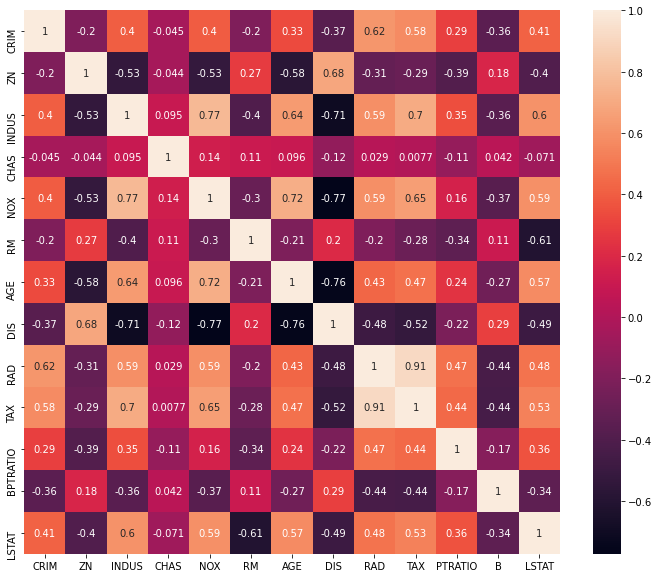

In [9]:
# Visualise the correlation matrix obtained after using Pearson Correlatino Coefficient
import seaborn as sns
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [10]:
# Function to select highly correlated features, threshold value that considers the features
# to be correlated needs to be provided to the function

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[j]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [12]:
# Call correlation function to find out the features that has a score above 0.7 as a correlation coefficient score
corr_features = correlation(X_train, 0.7)
print(corr_features)
print(len(set(corr_features)))

{'INDUS', 'RAD', 'AGE', 'NOX'}
4


In [14]:
corr_features

{'AGE', 'INDUS', 'NOX', 'RAD'}

In [15]:
# As the features are correlated to other independent features thus to avoid multicollinearity these features are deleted
X_train.drop({'INDUS', 'NOX', 'RAD'},axis=1)
X_test.drop({'INDUS', 'NOX', 'RAD'},axis=1)


,CRIM,ZN,CHAS,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,0.0,6.416,84.1,2.6463,296.0,16.6,395.50,9.04
274,0.05644,40.0,1.0,6.758,32.9,4.0776,254.0,17.6,396.90,3.53
491,0.10574,0.0,0.0,5.983,98.8,1.8681,711.0,20.1,390.11,18.07
72,0.09164,0.0,0.0,6.065,7.8,5.2873,305.0,19.2,390.91,5.52
452,5.09017,0.0,0.0,6.297,91.8,2.3682,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,0.0,4.628,100.0,1.5539,666.0,20.2,28.79,34.37
436,14.42080,0.0,0.0,6.461,93.3,2.0026,666.0,20.2,27.49,18.05
411,14.05070,0.0,0.0,6.657,100.0,1.5275,666.0,20.2,35.05,21.22
86,0.05188,0.0,0.0,6.015,45.1,4.4272,247.0,18.5,395.99,12.86


### In class assignment.

Go to - https://www.kaggle.com/lakshmi25npathi/santander-customer-transaction-prediction-dataset
Drop the features where correlation is 0.7 and train the model and make predictions on test data.
Drop the column with non-numeric feature, i.e. ID_code.